In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datamodel import OrderDepth, UserId, TradingState, Order, Listing
from typing import List
import string


In [3]:
trades_test = pd.read_csv('/Users/oscar/Library/CloudStorage/OneDrive-Personal/Documents/PERSONAL/Finance/Competition/IMC Prosperity/IMC_Prosperity_Huskies/Round 3/round-3-island-data-bottle/prices_round_3_day_0.csv', sep=';')

In [4]:
TS = 0
trade_ts = trades_test[trades_test.timestamp == TS]

In [5]:
trade_ts

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0


In [6]:
listings = {
        "CHOCOLATE": Listing("CHOCOLATE", "CHOCOLATE", "SEASHELLS"),
        "STRAWBERRIES": Listing("STRAWBERRIES", "STRAWBERRIES", "SEASHELLS"),
        "ROSES": Listing("ROSES", "ROSES", "SEASHELLS"),
        "GIFT_BASKET": Listing("GIFT_BASKET", "GIFT_BASKET", "SEASHELLS")
    }

order_depths = {}
for product in trade_ts['product']:
    buy_orders = {}
    sell_orders = {}
    for i in range(1,3):
        ask_price = trade_ts[trade_ts['product'] == product][f'ask_price_{i}'].values[0]
        ask_volume = trade_ts[trade_ts['product'] == product][f'ask_volume_{i}'].values[0]
        bid_price = trade_ts[trade_ts['product'] == product][f'bid_price_{i}'].values[0]
        bid_volume = trade_ts[trade_ts['product'] == product][f'bid_volume_{i}'].values[0]

        buy_orders[ask_price] = ask_volume
        sell_orders[bid_price] = bid_volume

    order_depths[product] = OrderDepth(buy_orders, sell_orders)


TypeError: __init__() takes 1 positional argument but 3 were given

In [ ]:
state = TradingState(
        'traderData',
        timestamp=TS,
        listings=listings,
        order_depths=,
        own_trades,
        market_trades,
        position,
        observations
    )

In [7]:
test_prices = pd.read_csv('/Users/oscar/Library/CloudStorage/OneDrive-Personal/Documents/PERSONAL/Finance/Competition/IMC Prosperity/IMC_Prosperity_Huskies/Round 3/round-3-island-data-bottle/trades_round_3_day_2_nn.csv', sep=';')

In [8]:
prices = trades_test.pivot_table(index='timestamp', columns='product', values=['ask_price_1', 'bid_price_1'])

# Simplify access to prices by product
ask_prices = prices['ask_price_1']
bid_prices = prices['bid_price_1']

# Calculate expected values
Expected_ask_GB = 4 * ask_prices['CHOCOLATE'] + 6 * ask_prices['STRAWBERRIES'] + ask_prices['ROSES']
Expected_bid_GB = 4 * bid_prices['CHOCOLATE'] + 6 * bid_prices['STRAWBERRIES'] + bid_prices['ROSES']

Expected_ask_C = 0.25 * (ask_prices['GIFT_BASKET'] - 6 * ask_prices['STRAWBERRIES'] - ask_prices['ROSES'])
Expected_bid_C = 0.25 * (bid_prices['GIFT_BASKET'] - 6 * bid_prices['STRAWBERRIES'] - bid_prices['ROSES'])

Expected_ask_S = (ask_prices['GIFT_BASKET'] - 4 * ask_prices['CHOCOLATE'] - ask_prices['ROSES']) / 6
Expected_bid_S = (bid_prices['GIFT_BASKET'] - 4 * bid_prices['CHOCOLATE'] - bid_prices['ROSES']) / 6

Expected_ask_R = ask_prices['GIFT_BASKET'] - 4 * ask_prices['CHOCOLATE'] - 6 * ask_prices['STRAWBERRIES']
Expected_bid_R = bid_prices['GIFT_BASKET'] - 4 * bid_prices['CHOCOLATE'] - 6 * bid_prices['STRAWBERRIES']

# Create dataframes for each product with expected and real prices
GB_df = pd.DataFrame({
    'Real_ask': ask_prices['GIFT_BASKET'],
    'Expected_ask_GB': Expected_ask_GB,
    'Real_bid': bid_prices['GIFT_BASKET'],
    'Expected_bid_GB': Expected_bid_GB
})

C_df = pd.DataFrame({
    'Real_ask': ask_prices['CHOCOLATE'],
    'Expected_ask_C': Expected_ask_C,
    'Real_bid': bid_prices['CHOCOLATE'],
    'Expected_bid_C': Expected_bid_C
})

S_df = pd.DataFrame({
    'Real_ask': ask_prices['STRAWBERRIES'],
    'Expected_ask_S': Expected_ask_S,
    'Real_bid': bid_prices['STRAWBERRIES'],
    'Expected_bid_S': Expected_bid_S
})

R_df = pd.DataFrame({
    'Real_ask': ask_prices['ROSES'],
    'Expected_ask_R': Expected_ask_R,
    'Real_bid': bid_prices['ROSES'],
    'Expected_bid_R': Expected_bid_R
})

In [9]:
GB_df['delta_ask'] = GB_df['Expected_ask_GB'] - GB_df['Real_ask']
GB_df['delta_bid'] = GB_df['Expected_bid_GB'] - GB_df['Real_bid']
GB_df['real_spread'] = GB_df['Real_ask'] - GB_df['Real_bid']
GB_df['expected_spread'] = GB_df['Expected_ask_GB'] - GB_df['Expected_bid_GB']

C_df['delta_ask'] = C_df['Expected_ask_C'] - C_df['Real_ask']
C_df['delta_bid'] = C_df['Expected_bid_C'] - C_df['Real_bid']
C_df['real_spread'] = C_df['Real_ask'] - C_df['Real_bid']
C_df['expected_spread'] = C_df['Expected_ask_C'] - C_df['Expected_bid_C']

S_df['delta_ask'] = S_df['Expected_ask_S'] - S_df['Real_ask']
S_df['delta_bid'] = S_df['Expected_bid_S'] - S_df['Real_bid']
S_df['real_spread'] = S_df['Real_ask'] - S_df['Real_bid']
S_df['expected_spread'] = S_df['Expected_ask_S'] - S_df['Expected_bid_S']

R_df['delta_ask'] = R_df['Expected_ask_R'] - R_df['Real_ask']
R_df['delta_bid'] = R_df['Expected_bid_R'] - R_df['Real_bid']
R_df['real_spread'] = R_df['Real_ask'] - R_df['Real_bid']
R_df['expected_spread'] = R_df['Expected_ask_R'] - R_df['Expected_bid_R']


In [41]:
# Combine the ask and bid prices into one DataFrame
combined_df = pd.DataFrame({
    'ask_GB': GB_df['Real_ask'],
    'bid_GB': GB_df['Real_bid'],
    'ask_C': C_df['Real_ask'],
    'bid_C': C_df['Real_bid'],
    'ask_R': R_df['Real_ask'],
    'bid_R': R_df['Real_bid'],
    'ask_S': S_df['Real_ask'],
    'bid_S': S_df['Real_bid'],
})

# Add the deltas from each DataFrame
combined_df = combined_df.join(GB_df[['delta_ask', 'delta_bid']], rsuffix='_GB')
combined_df = combined_df.join(C_df[['delta_ask', 'delta_bid']], rsuffix='_C')
combined_df = combined_df.join(R_df[['delta_ask', 'delta_bid']], rsuffix='_R')
combined_df = combined_df.join(S_df[['delta_ask', 'delta_bid']], rsuffix='_S')

combined_df = combined_df.rename(columns={'delta_ask': 'delta_ask_GB', 'delta_bid': 'delta_bid_GB'})

# Drop any rows with NaN values that could have occurred during joining
combined_df.dropna(inplace=True)


In [40]:
combined_df

,ask_C,bid_C,ask_R,bid_R,ask_S,bid_S,delta_ask_GB,delta_bid_GB,delta_ask_C,delta_bid_C,delta_ask_R,delta_bid_R,delta_ask_S,delta_bid_S
timestamp,,,,,,,,,,,,,,
0,8001,7999,15001,14999,4001,3999,-351,-359,87.75,89.75,351,359,58.500000,59.833333
100,8002,8001,15001,14999,4000,3999,-346,-347,86.50,86.75,346,347,57.666667,57.833333
200,8002,8000,15001,15000,4000,3999,-341,-350,85.25,87.50,341,350,56.833333,58.333333
300,8003,8002,15001,14999,4000,3999,-343,-344,85.75,86.00,343,344,57.166667,57.333333
400,8003,8001,14998,14997,4000,3999,-337,-341,84.25,85.25,337,341,56.166667,56.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,7988,7987,14544,14543,4032,4030,-460,-464,115.00,116.00,460,464,76.666667,77.333333
999600,7989,7988,14549,14547,4032,4030,-440,-453,110.00,113.25,440,453,73.333333,75.500000
999700,7988,7987,14547,14546,4032,4030,-443,-449,110.75,112.25,443,449,73.833333,74.833333


In [45]:
import statsmodels.api as sm

def perform_regression(target, df):
    X = df[['ask_C', 'bid_C', 'ask_R', 'bid_R', 'ask_S', 'bid_S']]
    X = sm.add_constant(X)  # adding a constant for intercept
    y = df[target]#.shift(1).replace(np.nan, 0)
    model = sm.OLS(y, X).fit()
    print(f'Regression results for {target}:')
    print(model.summary())

    return model


In [46]:
# Perform regression for each delta
model_ask_GB = perform_regression('delta_ask_GB', combined_df)


Regression results for delta_ask_GB:
                            OLS Regression Results                            
Dep. Variable:           delta_ask_GB   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     208.8
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          6.95e-252
Time:                        22:37:33   Log-Likelihood:                -58065.
No. Observations:               10000   AIC:                         1.161e+05
Df Residuals:                    9993   BIC:                         1.162e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.4

In [47]:
# Perform regression for each delta
model_ask_GB = perform_regression('delta_ask_GB', combined_df)
model_bid_GB = perform_regression('delta_bid_GB', combined_df)

model_ask_C = perform_regression('delta_ask_C', combined_df)
model_bid_C = perform_regression('delta_bid_C', combined_df)

model_ask_S = perform_regression('delta_ask_S', combined_df)
model_bid_S = perform_regression('delta_bid_S', combined_df)


model_ask_R = perform_regression('delta_ask_R', combined_df)
model_bid_R = perform_regression('delta_bid_R', combined_df)


Regression results for delta_ask_GB:
                            OLS Regression Results                            
Dep. Variable:           delta_ask_GB   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     208.8
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          6.95e-252
Time:                        22:37:34   Log-Likelihood:                -58065.
No. Observations:               10000   AIC:                         1.161e+05
Df Residuals:                    9993   BIC:                         1.162e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.4

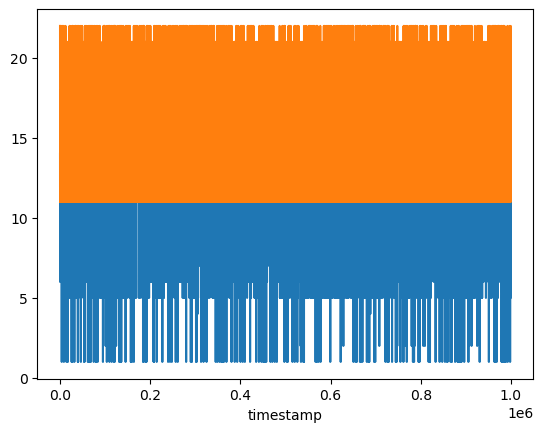

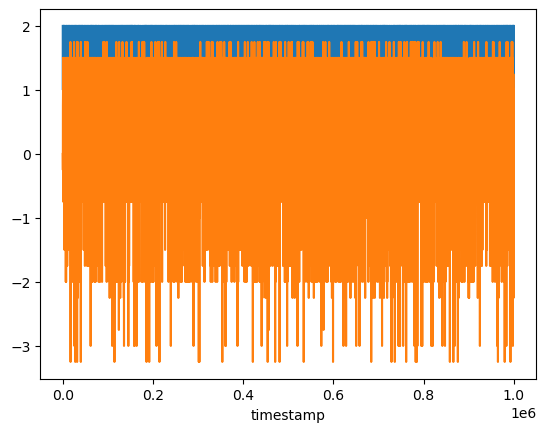

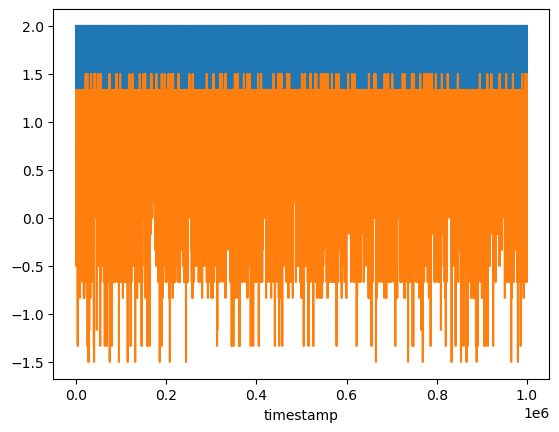

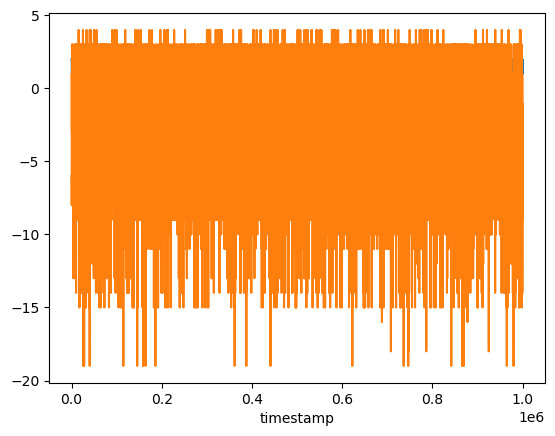

In [15]:
GB_df['real_spread'].plot()
GB_df['expected_spread'].plot()
plt.show()

C_df['real_spread'].plot()
C_df['expected_spread'].plot()
plt.show()

S_df['real_spread'].plot()
S_df['expected_spread'].plot()
plt.show()

R_df['real_spread'].plot()
R_df['expected_spread'].plot()
plt.show()



In [29]:
print(GB_df[['delta_ask', 'delta_bid']].mean())
print('\n')
print(C_df[['delta_ask', 'delta_bid']].mean())
print('\n')
print(S_df[['delta_ask', 'delta_bid']].mean())
print('\n')
print(R_df[['delta_ask', 'delta_bid']].mean())



delta_ask   -368.0815
delta_bid   -372.3797
dtype: float64


delta_ask    92.020375
delta_bid    93.094925
dtype: float64


delta_ask    61.346917
delta_bid    62.063283
dtype: float64


delta_ask    368.0815
delta_bid    372.3797
dtype: float64


<Axes: xlabel='timestamp'>

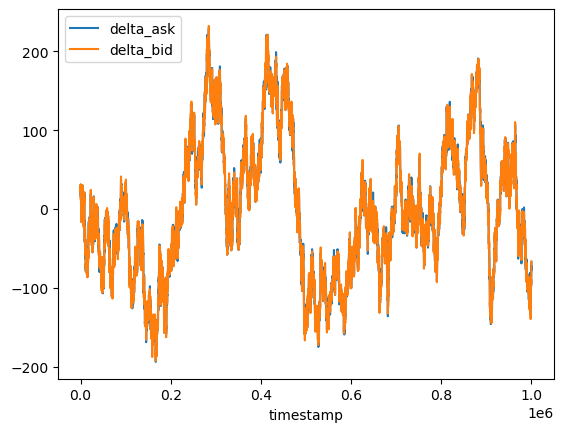

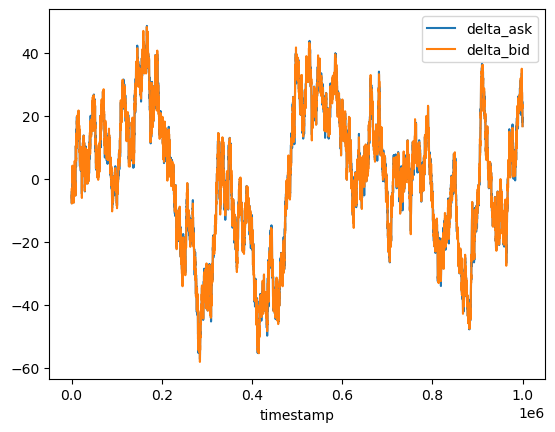

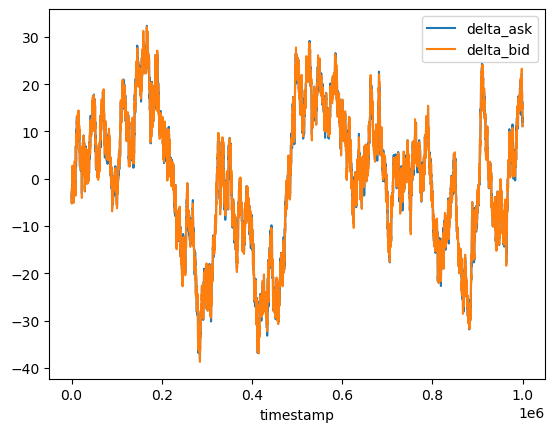

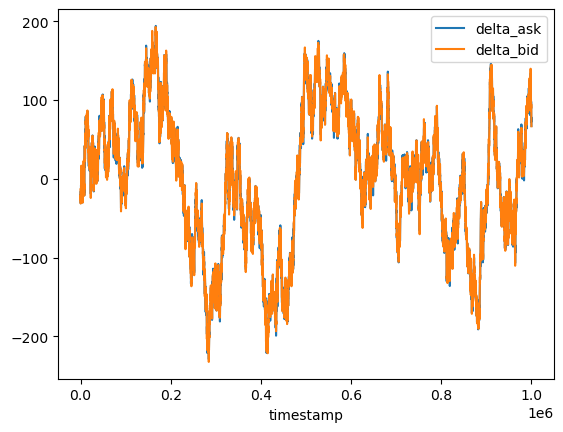

In [28]:
(GB_df[['delta_ask', 'delta_bid']] - GB_df[['delta_ask', 'delta_bid']].mean()).plot()
(C_df[['delta_ask', 'delta_bid']] - C_df[['delta_ask', 'delta_bid']].mean()).plot()
(S_df[['delta_ask', 'delta_bid']] - S_df[['delta_ask', 'delta_bid']].mean()).plot()
(R_df[['delta_ask', 'delta_bid']] - R_df[['delta_ask', 'delta_bid']].mean()).plot()

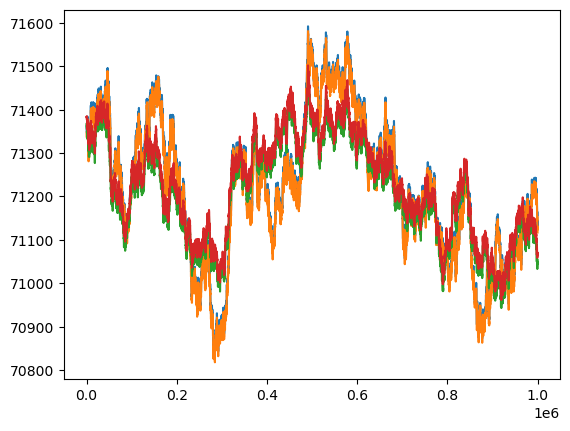

In [37]:
plt.plot(GB_df[['Real_ask', 'Real_bid']])
plt.plot(GB_df[['Expected_bid_GB', 'Expected_ask_GB']] + np.array([368, 372]))


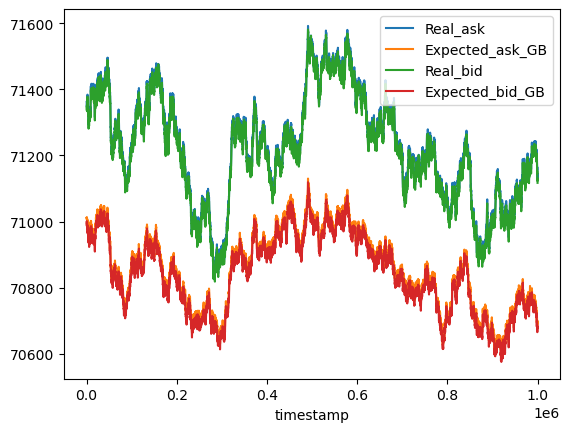

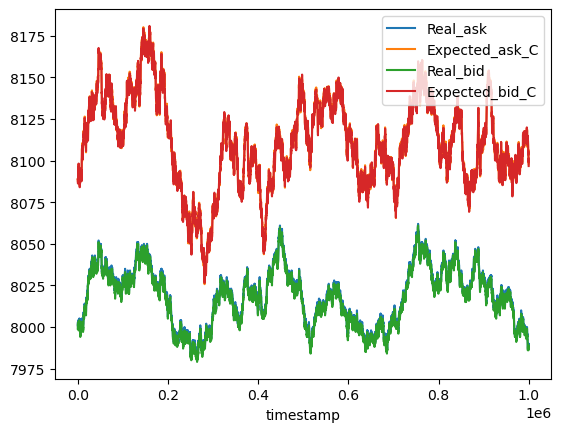

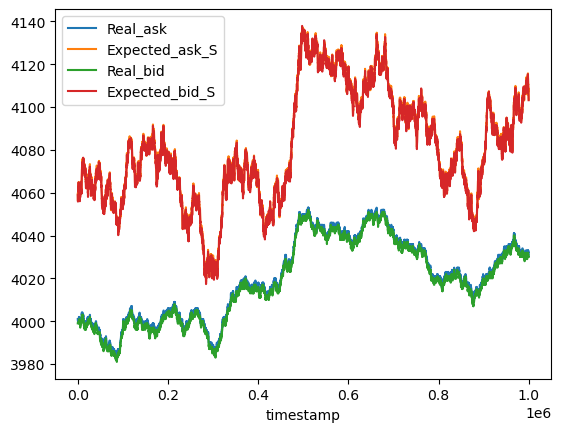

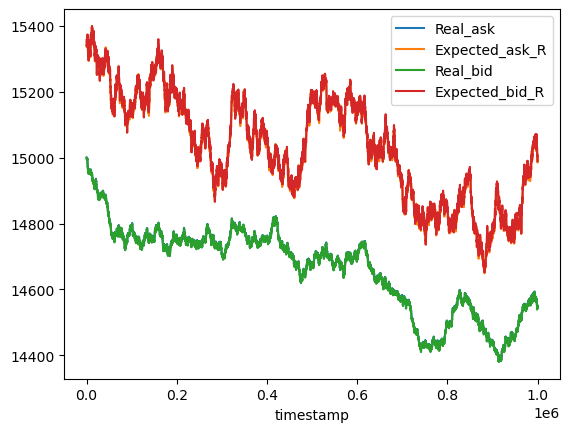

In [17]:
GB_df[['Real_ask', 'Expected_ask_GB', 'Real_bid', 'Expected_bid_GB']].plot()
plt.show()

C_df[['Real_ask', 'Expected_ask_C', 'Real_bid', 'Expected_bid_C']].plot()
plt.show()

S_df[['Real_ask', 'Expected_ask_S', 'Real_bid', 'Expected_bid_S']].plot()
plt.show()

R_df[['Real_ask', 'Expected_ask_R', 'Real_bid', 'Expected_bid_R']].plot()
plt.show()